In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import requests
import tensorflow_datasets as tfds
from tqdm import tqdm
import os
import shutil
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout


import keras
import cv2
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

2024-04-16 07:34:22.646118: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 07:34:22.646240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 07:34:22.785949: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# # to get the files in proper order
# def sorted_alphanumeric(data):  
#     convert = lambda text: int(text) if text.isdigit() else text.lower()
#     alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
#     return sorted(data,key = alphanum_key)
# # defining the size of the image
# SIZE = 256
# high_img = []
# path = '../input/sr-3000/SR-3000/HR/train'
# files = os.listdir(path)
# files = sorted_alphanumeric(files)
# for i in tqdm(files):       
#     img = cv2.imread(path + '/'+i,1)
#     # open cv reads images in BGR format so we have to convert it to RGB
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     #resizing image
#     img = cv2.resize(img, (SIZE, SIZE))
#     img = img.astype('float32') / 255.0
#     high_img.append(img_to_array(img))


# low_img = []
# path = '../input/sr-3000/SR-3000/HR/train'
# files = os.listdir(path)
# files = sorted_alphanumeric(files)
# for i in tqdm(files):
#     img = cv2.imread(os.path.join(path, i), 1)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#     # Resizing image to a smaller size using bicubic interpolation
#     small_img = cv2.resize(img, (180, 180))
    
#     # Resizing the small image back to the original size
#     pixelated_img = cv2.resize(small_img, (SIZE, SIZE))
    
#     pixelated_img = pixelated_img.astype('float32') / 255.0
#     low_img.append(pixelated_img)

In [3]:
# import os
# import cv2
# import re
# from tqdm import tqdm
# from keras.preprocessing.image import img_to_array

# # Function to sort alphanumeric strings
# def sorted_alphanumeric(data):
#     convert = lambda text: int(text) if text.isdigit() else text.lower()
#     alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
#     return sorted(data, key=alphanum_key)

# # Defining the size of the image
# SIZE = 256

# # List to store high-resolution images
# high_img = []

# # Paths to process
# paths = ['/kaggle/input/spacenet-3-5-train-dataset/SpaceNet_Roads/train/images','/kaggle/input/spacenet-3-5-train-dataset/SpaceNet_Roads/val/images']

# # Iterating over each path
# for path in paths:
#     # Getting files in proper order
#     files = os.listdir(path)
#     files = sorted_alphanumeric(files)
    
#     # Processing each file
#     for i in tqdm(files):
#         img = cv2.imread(os.path.join(path, i), 1)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = cv2.resize(img, (SIZE, SIZE))
#         img = img.astype('float32') / 255.0
#         high_img.append(img_to_array(img))

# # List to store low-resolution images
# low_img = []

# # Iterating over each path (same as above)
# for path in paths:
#     files = os.listdir(path)
#     files = sorted_alphanumeric(files)
    
#     for i in tqdm(files)[:2000]:
#         img = cv2.imread(os.path.join(path, i), 1)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
#         small_img = cv2.resize(img, (180, 180))
#         pixelated_img = cv2.resize(small_img, (SIZE, SIZE))
        
#         pixelated_img = pixelated_img.astype('float32') / 255.0
#         low_img.append(pixelated_img)


In [4]:
import os
import cv2
import re
from tqdm import tqdm
from keras.preprocessing.image import img_to_array

# Function to sort alphanumeric strings
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(data, key=alphanum_key)

# Defining the size of the image
SIZE = 128

# List to store high-resolution images
high_img = []

# Paths to process
paths = ['/kaggle/input/eurosat-sentinel2-dataset/Dataset']

# Maximum number of images to take from each path
max_images_per_path = 3000

# Iterating over each path
for path in paths:
    # Getting files in proper order
    files = os.listdir(path)
    files = sorted_alphanumeric(files)
    
    # Slicing the files list to take only the first 2000 files
    files = files[:max_images_per_path]
    
    # Processing each file
    for i in tqdm(files):
        img = cv2.imread(os.path.join(path, i), 1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        high_img.append(img_to_array(img))

# List to store low-resolution images
low_img = []

# Iterating over each path (same as above)
for path in paths:
    files = os.listdir(path)
    files = sorted_alphanumeric(files)
    
    # Slicing the files list to take only the first 2000 files
    files = files[:max_images_per_path]
    
    for i in tqdm(files):
        img = cv2.imread(os.path.join(path, i), 1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        small_img = cv2.resize(img, (20, 20))
        pixelated_img = cv2.resize(small_img, (SIZE, SIZE))
        
        pixelated_img = pixelated_img.astype('float32') / 255.0
        low_img.append(pixelated_img)


100%|██████████| 3000/3000 [00:03<00:00, 755.72it/s]


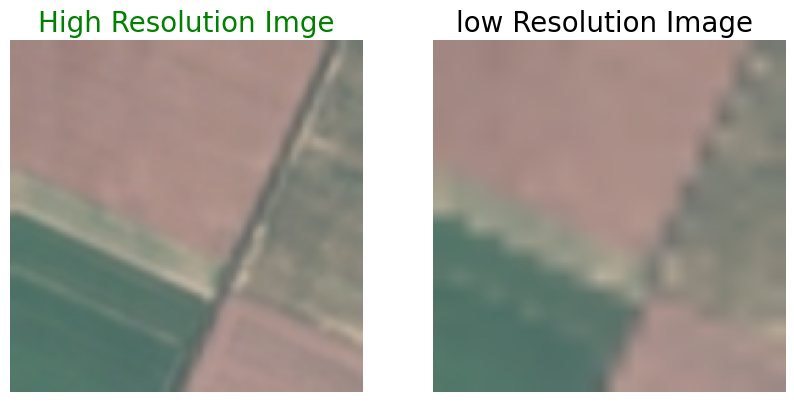

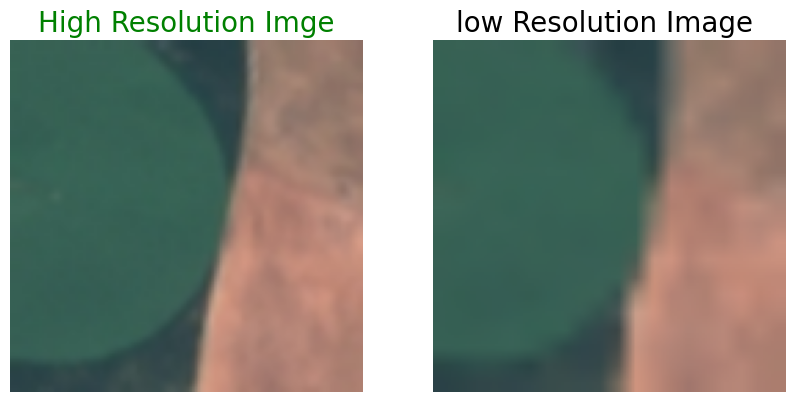

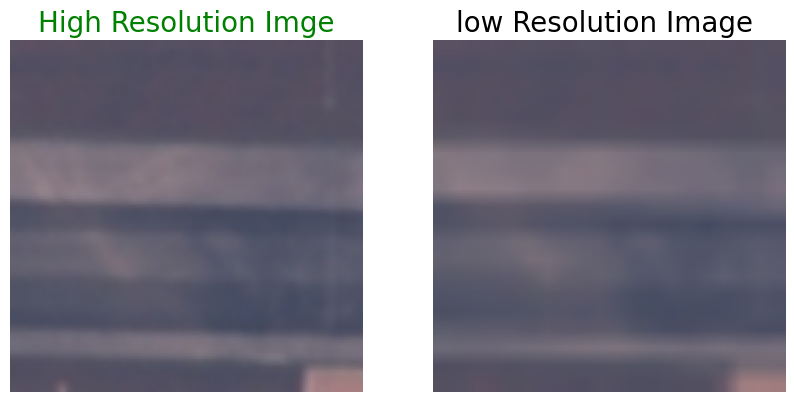

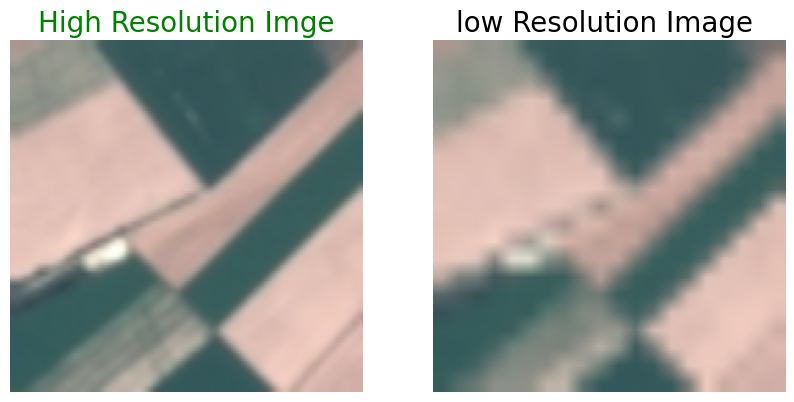

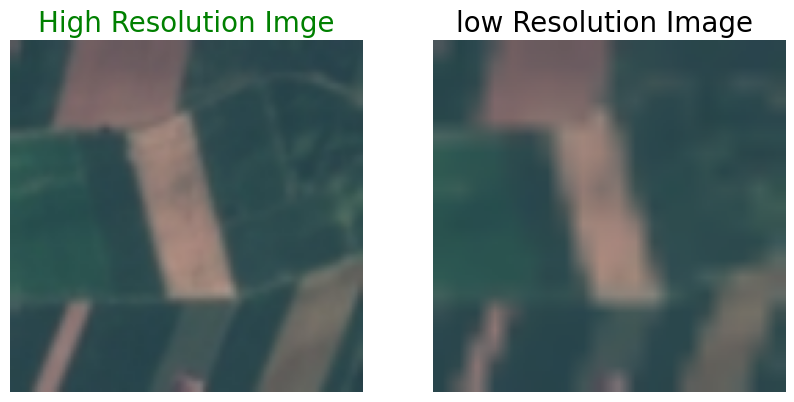

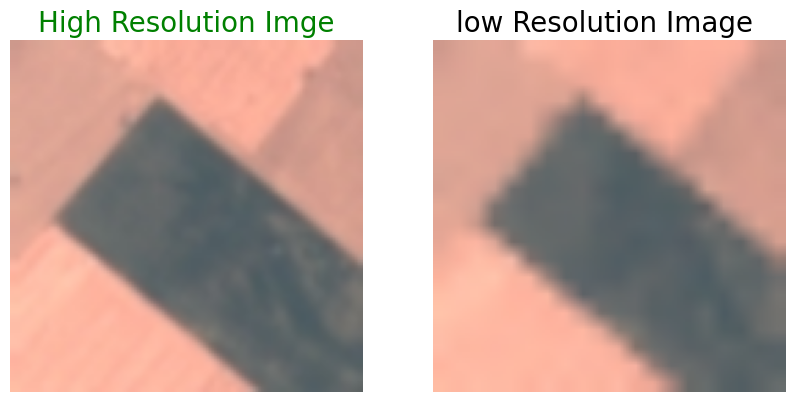

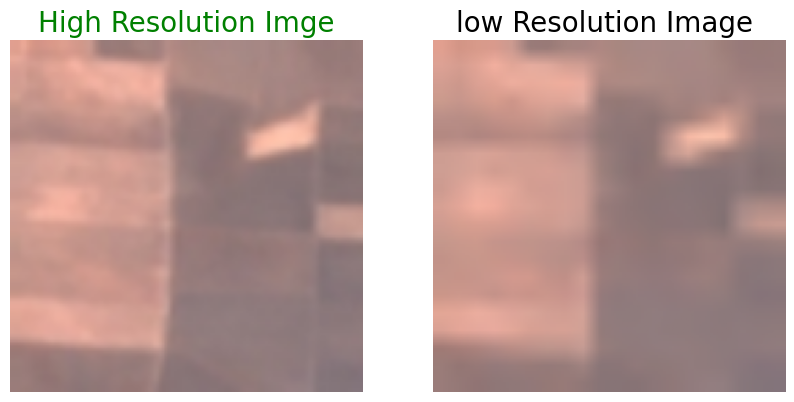

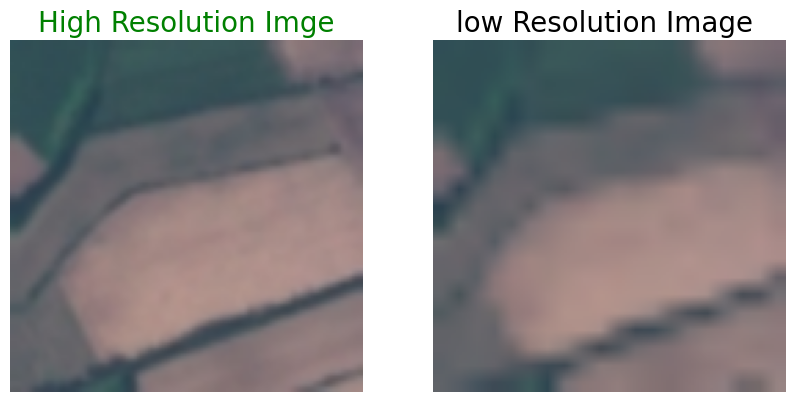

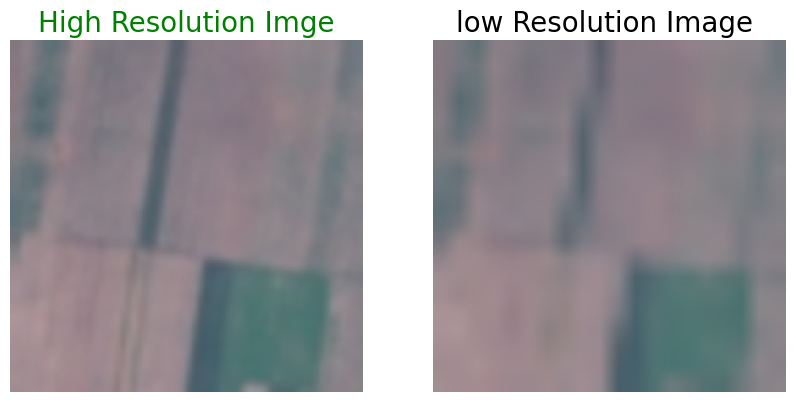

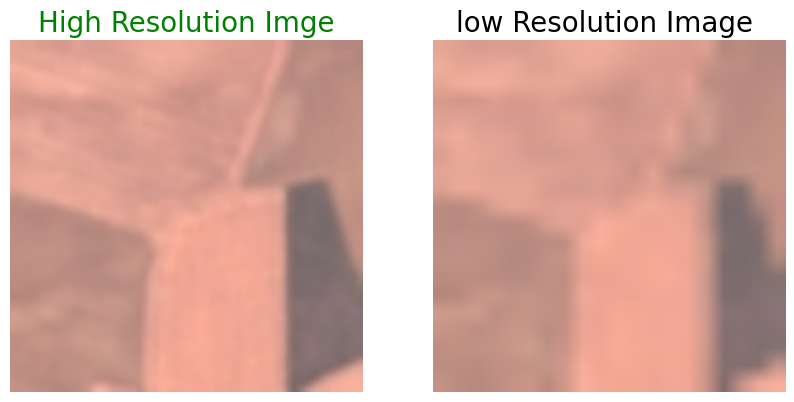

In [5]:
for i in range(10):
    a = np.random.randint(0,855)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Imge', color = 'green', fontsize = 20)
    plt.imshow(high_img[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(low_img[a])
    plt.axis('off')

In [6]:
import numpy as np

# Assuming high_img and low_img are already defined

# Calculate the number of samples for each set
total_samples = len(high_img)
train_samples = int(total_samples * 0.7)
valid_samples = int(total_samples * 0.2)
test_samples = total_samples - train_samples - valid_samples

# Split high_img and low_img
train_high_image = high_img[:train_samples]
train_low_image = low_img[:train_samples]
train_high_image = np.reshape(train_high_image, (len(train_high_image), SIZE, SIZE, 3))
train_low_image = np.reshape(train_low_image, (len(train_low_image), SIZE, SIZE, 3))

validation_high_image = high_img[train_samples:train_samples + valid_samples]
validation_low_image = low_img[train_samples:train_samples + valid_samples]
validation_high_image = np.reshape(validation_high_image, (len(validation_high_image), SIZE, SIZE, 3))
validation_low_image = np.reshape(validation_low_image, (len(validation_low_image), SIZE, SIZE, 3))

test_high_image = high_img[train_samples + valid_samples:]
test_low_image = low_img[train_samples + valid_samples:]
test_high_image = np.reshape(test_high_image, (len(test_high_image), SIZE, SIZE, 3))
test_low_image = np.reshape(test_low_image, (len(test_low_image), SIZE, SIZE, 3))

print("Shape of training images:", train_high_image.shape)
print("Shape of test images:", test_high_image.shape)
print("Shape of validation images:", validation_high_image.shape)

print("Shape of training images:", train_low_image.shape)
print("Shape of test images:", test_low_image.shape)
print("Shape of validation images:", validation_low_image.shape)


Shape of training images: (2100, 128, 128, 3)
Shape of test images: (300, 128, 128, 3)
Shape of validation images: (600, 128, 128, 3)
Shape of training images: (2100, 128, 128, 3)
Shape of test images: (300, 128, 128, 3)
Shape of validation images: (600, 128, 128, 3)


In [7]:
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay
# from tensorflow.keras import layers
# from tensorflow.keras.utils import plot_model

# def residual_block_gen(ch=64,k_s=3,st=1):
#     model=tf.keras.Sequential([
#     tf.keras.layers.Conv2D(ch,k_s,strides=(st,st),padding='same'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.LeakyReLU(),
#     tf.keras.layers.Conv2D(ch,k_s,strides=(st,st),padding='same'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.LeakyReLU(),])
#     return model

# import tensorflow as tf

# def Upsample_block(x, ch=256, k_s=3, st=1):
#     x = tf.keras.layers.Conv2D(ch, k_s, strides=(st,st), padding='same')(x)
#     x = tf.keras.layers.Lambda(lambda x: tf.nn.depth_to_space(x, 2))(x) # Wrap depth_to_space in a Lambda layer
#     x = tf.keras.layers.LeakyReLU()(x)
#     return x


# lr=tf.keras.layers.Input(shape=(256,256,3))
# input_conv=tf.keras.layers.Conv2D(64,9,padding='same')(lr)
# input_conv=tf.keras.layers.LeakyReLU()(input_conv)

# def model():
#     SRRes=input_conv
#     for x in range(5):
#         res_output=residual_block_gen()(SRRes)
#         SRRes=Upsample_block(SRRes)
#         SRRes=MaxPooling2D()(SRRes)
#         SRRes=tf.keras.layers.Add()([SRRes,res_output])
#         SRRes=tf.keras.layers.Conv2D(64,9,padding='same')(SRRes)
#     SRRes=tf.keras.layers.BatchNormalization()(SRRes)
#     SRRes=tf.keras.layers.Add()([SRRes,input_conv])
#     SRRes=Upsample_block(SRRes)
#     SRRes=MaxPooling2D()(SRRes)
#     #SRRes=Upsample_block(SRRes)
#     #SRRes=downsample_image(SRRes,4)
#     #SRRes=Upsample_block(SRRes)
#     output_sr=tf.keras.layers.Conv2D(3,9,activation='sigmoid',padding='same')(SRRes)
#     return tf.keras.models.Model(lr,output_sr)

# model = model()

# model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'mean_absolute_error',
#               metrics = ['acc'])

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay
from tensorflow.keras import layers
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply
from tensorflow.keras.utils import plot_model

def residual_block_gen(ch=64,k_s=3,st=1):
    model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(ch,k_s,strides=(st,st),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv2D(ch,k_s,strides=(st,st),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),])
    return model

import tensorflow as tf

def Upsample_block(x, ch=256, k_s=3, st=1):
    x = tf.keras.layers.Conv2D(ch, k_s, strides=(st,st), padding='same')(x)
    x = tf.keras.layers.Lambda(lambda x: tf.nn.depth_to_space(x, 2))(x) # Wrap depth_to_space in a Lambda layer
    x = tf.keras.layers.LeakyReLU()(x)
    return x

def se_block(input_tensor, ch_ratio=16): # Squeeze and Excitation Block
    ch_input = int(input_tensor.shape[-1])
    squeeze = GlobalAveragePooling2D()(input_tensor)
    excitation = Dense(ch_input//ch_ratio, activation='relu')(squeeze)
    excitation = Dense(ch_input, activation='sigmoid')(excitation)
    excitation = Reshape((1, 1, ch_input))(excitation)
    scaled_input = multiply([input_tensor, excitation])
    return scaled_input

lr=tf.keras.layers.Input(shape=(128,128,3))
input_conv=tf.keras.layers.Conv2D(64,9,padding='same')(lr)
input_conv=tf.keras.layers.LeakyReLU()(input_conv)

def model():
    SRRes=input_conv
    for x in range(5):
        res_output=residual_block_gen()(SRRes)
        SRRes=Upsample_block(SRRes)
        SRRes=MaxPooling2D()(SRRes)
        SRRes=tf.keras.layers.Add()([SRRes,res_output])
        SRRes=tf.keras.layers.Conv2D(64,9,padding='same')(SRRes)
        SRRes = se_block(SRRes) # Applying SE block after each residual block
    SRRes=tf.keras.layers.BatchNormalization()(SRRes)
    SRRes=tf.keras.layers.Add()([SRRes,input_conv])
    SRRes=Upsample_block(SRRes)
    SRRes=MaxPooling2D()(SRRes)
    #SRRes=Upsample_block(SRRes)
    #SRRes=downsample_image(SRRes,4)
    #SRRes=Upsample_block(SRRes)
    output_sr=tf.keras.layers.Conv2D(3,9,activation='sigmoid',padding='same')(SRRes)
    return tf.keras.models.Model(lr,output_sr)

model = model()

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'mean_absolute_error',
              metrics = ['acc'])


In [9]:
import logging
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

Epoch 1/85


I0000 00:00:1713252930.511372      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713252930.550318      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713252930.552959      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713252930.555558      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713252930.558064      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713252930.560734      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - acc: 0.6844 - loss: 0.0709

W0000 00:00:1713253013.877324      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713253013.880039      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713253013.882698      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713253013.885285      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713253013.887837      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 482ms/step
 - train_PSNR: 27.15 dB
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 852ms/step
 - val_PSNR: 27.22 dB
525/525 ━━━━━━━━━━━━━━━━━━━━ 181s 292ms/step - acc: 0.6845 - loss: 0.0709 - val_acc: 0.8179 - val_loss: 0.0360 - train_PSNR: 27.1502 - val_PSNR: 27.2156
Epoch 2/85
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 359ms/step
 - train_PSNR: 27.93 dB
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step
 - val_PSNR: 28.05 dB
525/525 ━━━━━━━━━━━━━━━━━━━━ 122s 233ms/step - acc: 0.8242 - loss: 0.0416 - val_acc: 0.7402 - val_loss: 0.0296 - train_PSNR: 27.9307 - val_PSNR: 28.0468
Epoch 3/85
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 359ms/step
 - train_PSNR: 31.33 dB
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step
 - val_PSNR: 31.45 dB
525/525 ━━━━━━━━━━━━━━━━━━━━ 122s 233ms/step - acc: 0.8497 - loss: 0.0333 - val_acc: 0.8915 - val_loss: 0.0199 - train_PSNR: 31.3278 - val_PSNR: 31.4507
Epoch 4/85
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 359ms/step
 - train_PSNR: 30.51 dB
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step
 - val_PSNR: 

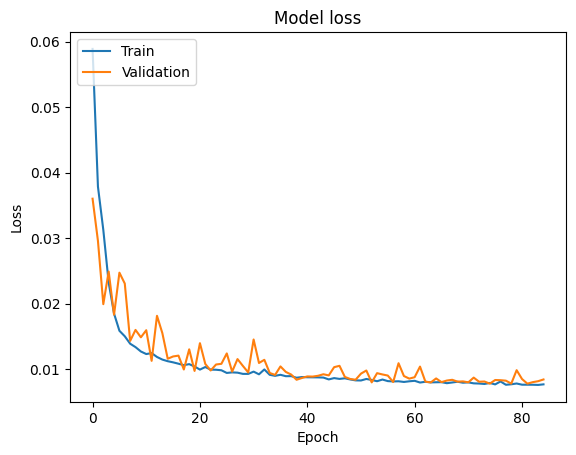

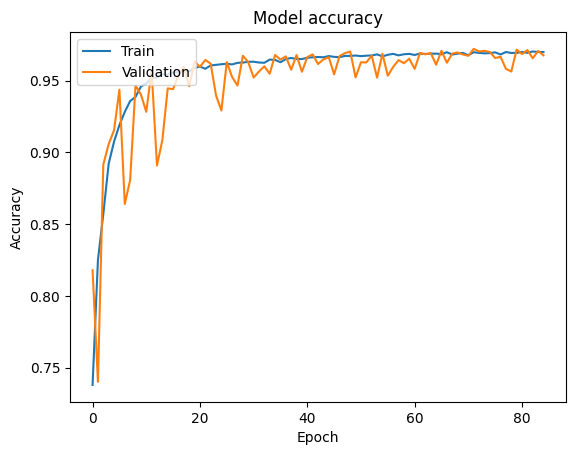

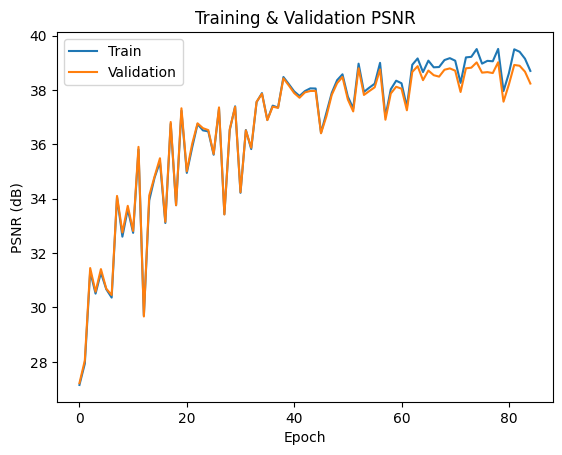

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio

class PSNRCallback(tf.keras.callbacks.Callback):
    def __init__(self, train_data, val_data):
        super(PSNRCallback, self).__init__()
        self.train_data = train_data
        self.val_data = val_data

    def on_epoch_end(self, epoch, logs=None):
        # Calculate training PSNR
        x_train, y_train = self.train_data
        y_train_pred = self.model.predict(x_train)
        train_psnr = np.mean([peak_signal_noise_ratio(y_train[i], y_train_pred[i]) for i in range(len(y_train))])
        print(f' - train_PSNR: {train_psnr:.2f} dB')

        # Calculate validation PSNR
        x_val, y_val = self.val_data
        y_val_pred = self.model.predict(x_val)
        val_psnr = np.mean([peak_signal_noise_ratio(y_val[i], y_val_pred[i]) for i in range(len(y_val))])
        print(f' - val_PSNR: {val_psnr:.2f} dB')

        if logs is not None:
            logs['train_PSNR'] = train_psnr
            logs['val_PSNR'] = val_psnr

# Define your model and compile it

history = model.fit(train_low_image, train_high_image, epochs=85, batch_size=4,
                    validation_data=(validation_low_image, validation_high_image),
                    callbacks=[PSNRCallback((train_low_image, train_high_image), (validation_low_image, validation_high_image))])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation PSNR
plt.plot(history.history['train_PSNR'])
plt.plot(history.history['val_PSNR'])
plt.title('Training & Validation PSNR')
plt.ylabel('PSNR (dB)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [11]:
def PSNR(y_true,y_pred):
  mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
  return 20 * log10(1 / (mse ** 0.5))

def log10(x):
  numerator = tf.math.log(x)
  denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
  return numerator / denominator

def pixel_MSE(y_true,y_pred):
  return tf.reduce_mean( (y_true - y_pred) ** 2 )

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


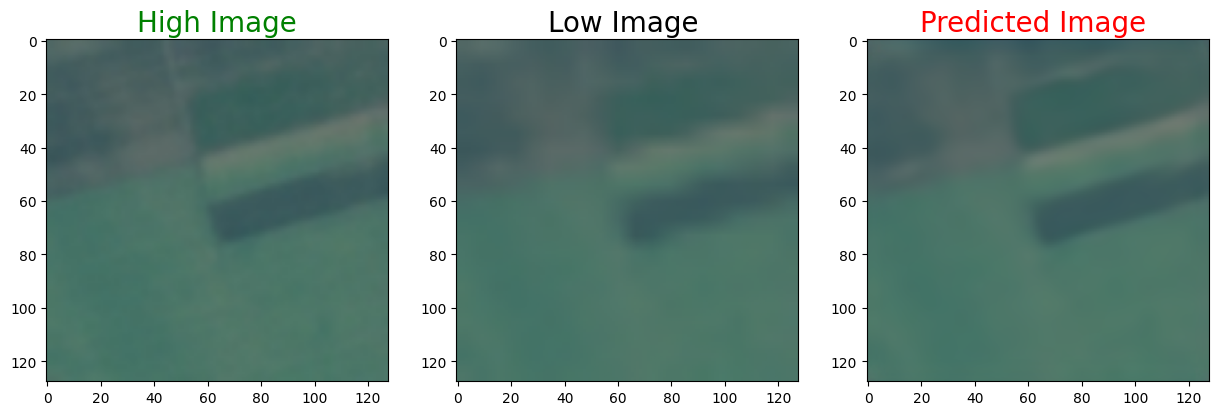

PSNR tf.Tensor(42.364002, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


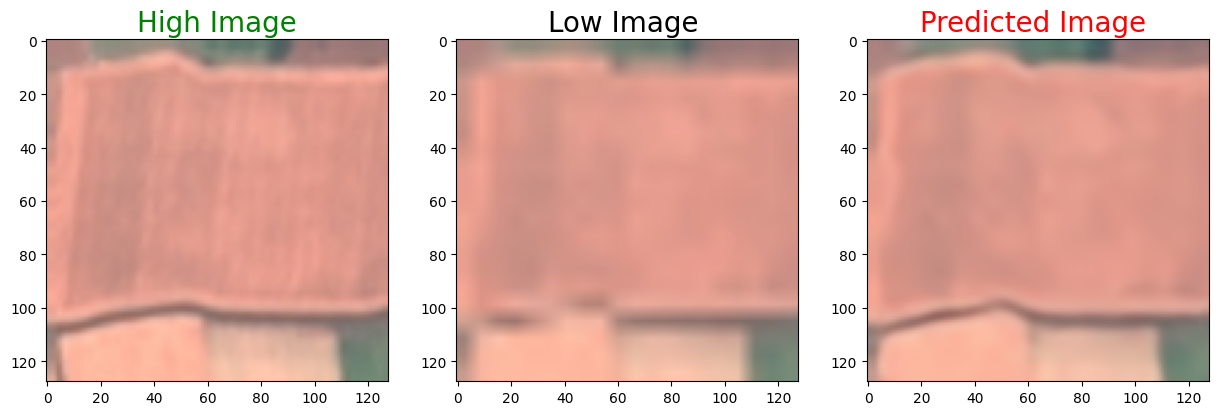

PSNR tf.Tensor(33.854507, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


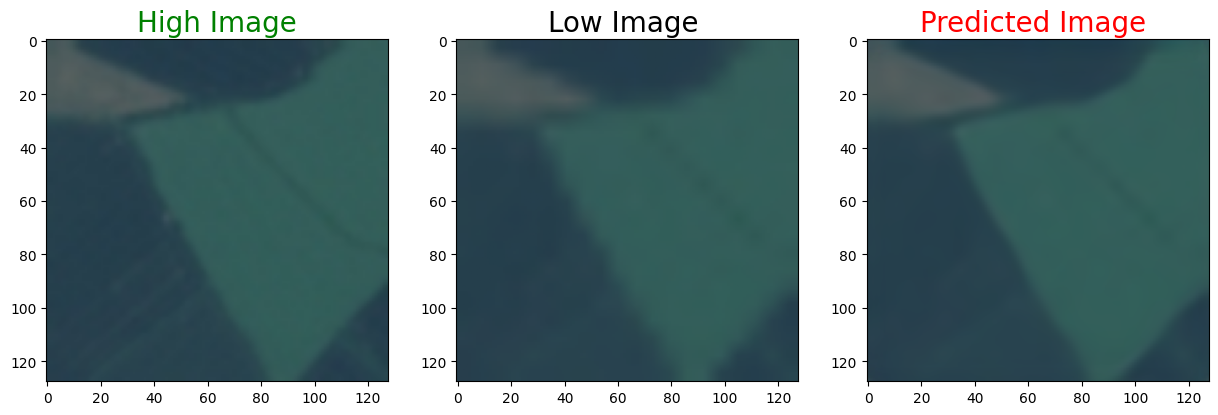

PSNR tf.Tensor(44.042324, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


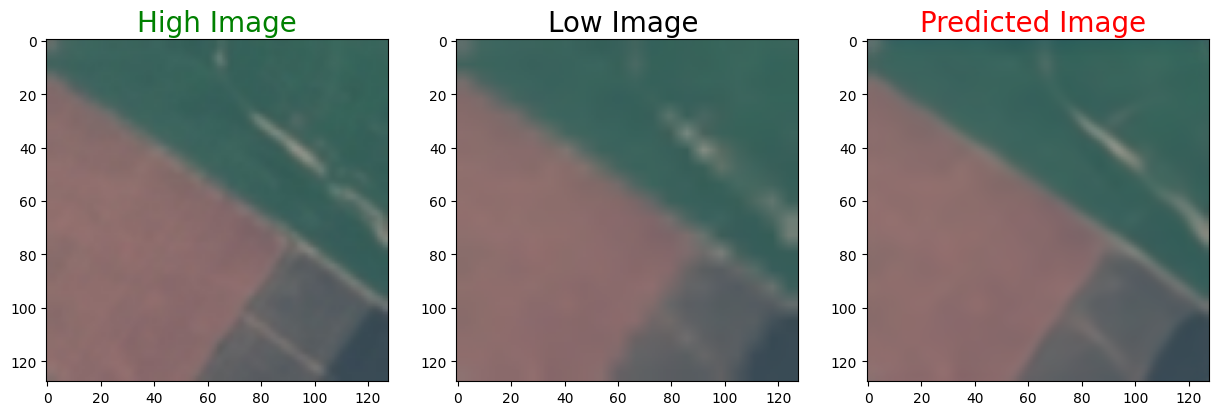

PSNR tf.Tensor(41.010216, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


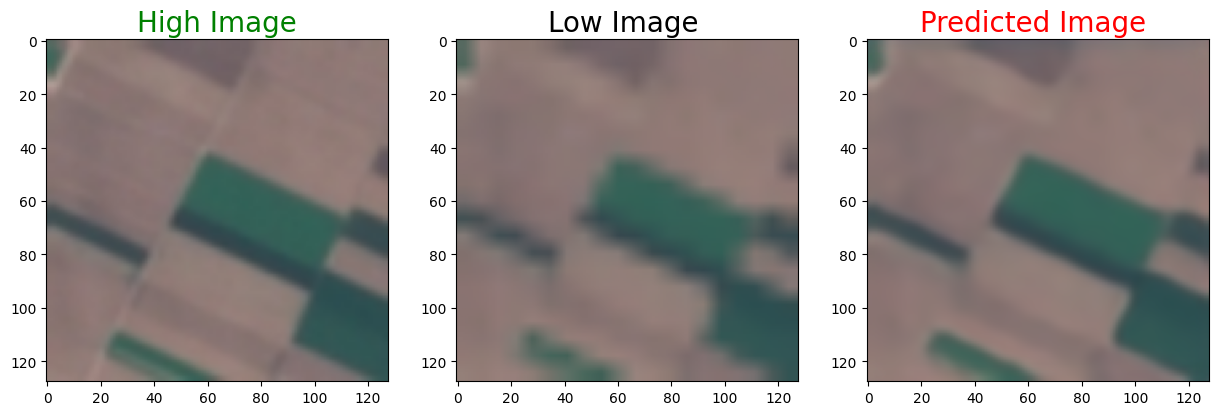

PSNR tf.Tensor(39.763477, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


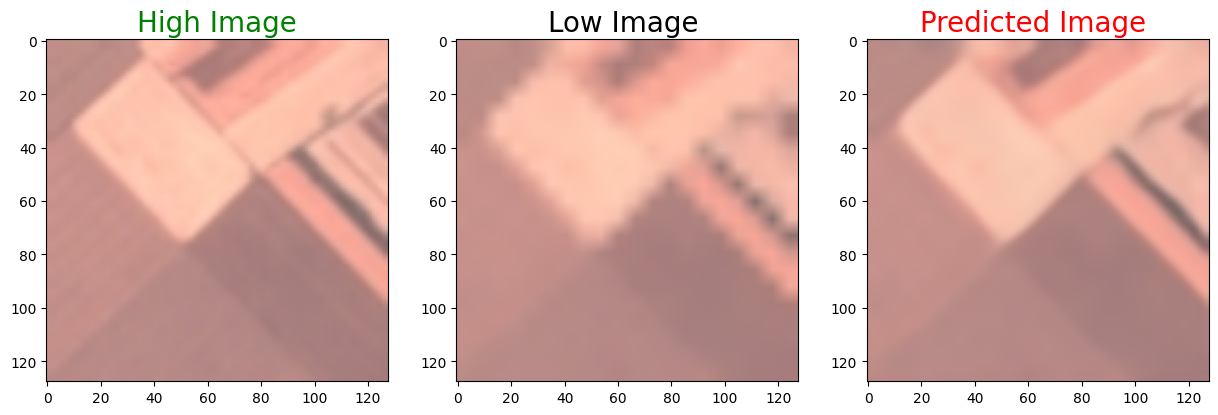

PSNR tf.Tensor(36.312897, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


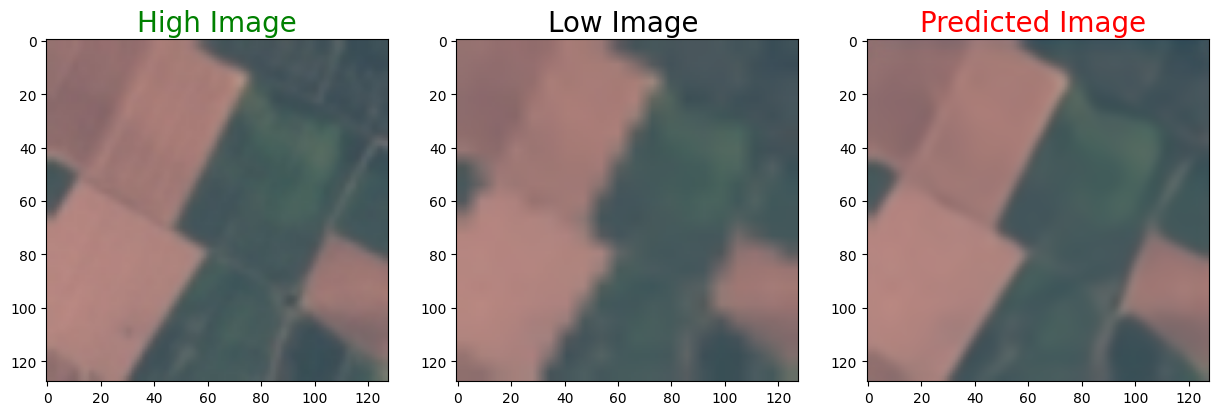

PSNR tf.Tensor(40.3002, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


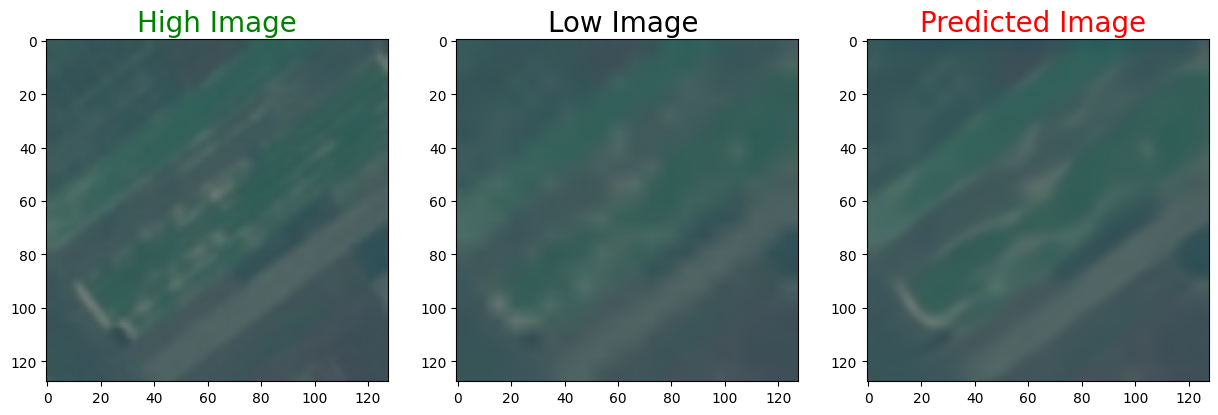

PSNR tf.Tensor(40.18227, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


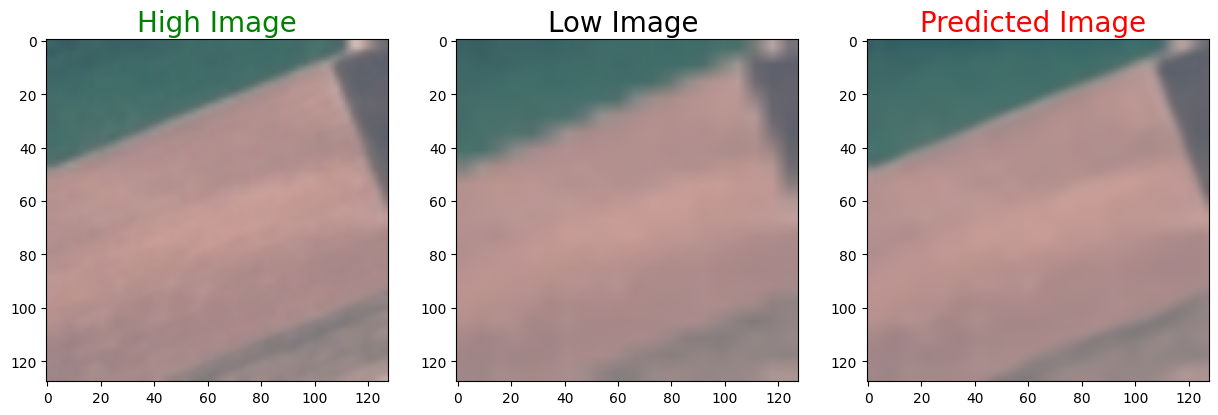

PSNR tf.Tensor(41.52195, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


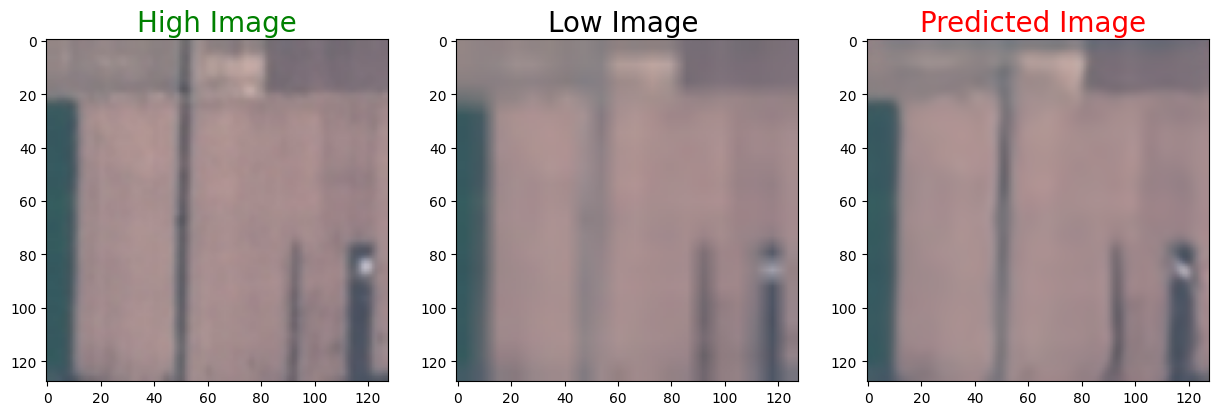

PSNR tf.Tensor(34.620026, shape=(), dtype=float32)


In [12]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

for i in range(10,20):
    
    predicted = np.clip(model.predict(test_low_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_high_image[i],test_low_image[i],predicted)
    print('PSNR', PSNR(test_high_image[i],predicted))

In [13]:

# import numpy as np
# import tensorflow as tf
# from tqdm.auto import tqdm  # Import tqdm

# def PSNR(y_true, y_pred):
#     mse = tf.reduce_mean((y_true - y_pred) ** 2)
#     return 20 * log10(1 / tf.sqrt(mse))

# def log10(x):
#     numerator = tf.math.log(x)
#     denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
#     return numerator / denominator

# def pixel_MSE(y_true, y_pred):
#     return tf.reduce_mean((y_true - y_pred) ** 2)

# def calculate_psnr(model, test_low_images, test_high_images):
#     psnr_scores = []
#     with tqdm(total=len(test_low_images), leave=False) as pbar:
#         for i in range(len(test_low_images)):
#             # Suppress output with verbose=0
#             predicted = np.clip(model.predict(test_low_images[i].reshape(1, SIZE, SIZE, 3), verbose=0), 0.0, 1.0).reshape(SIZE, SIZE, 3)
#             psnr_score = PSNR(test_high_images[i], predicted)
#             psnr_scores.append(psnr_score)
#             pbar.update(1)
#     average_psnr = np.mean(psnr_scores)
#     return average_psnr

# # Assuming you have `model`, `test_low_image`, and `test_high_image` defined elsewhere
# average_psnr = calculate_psnr(model, test_low_image, test_high_image)
# print('Average PSNR on the test set:', average_psnr)


In [14]:
import numpy as np
import tensorflow as tf
from tqdm.auto import tqdm  # Import tqdm

def PSNR(y_true, y_pred):
    mse = tf.reduce_mean((y_true - y_pred) ** 2)
    return 20 * log10(1 / tf.sqrt(mse))

def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

def pixel_MSE(y_true, y_pred):
    return tf.reduce_mean((y_true - y_pred) ** 2)

def ssim(y_true, y_pred):
    return tf.image.ssim(y_true, y_pred, max_val=1.0)

def calculate_metrics(model, test_low_images, test_high_images):
    psnr_scores = []
    ssim_scores = []
    with tqdm(total=len(test_low_images), leave=False) as pbar:
        for i in range(len(test_low_images)):
            predicted = np.clip(model.predict(test_low_images[i].reshape(1, SIZE, SIZE, 3), verbose=0), 0.0, 1.0).reshape(SIZE, SIZE, 3)
            psnr_score = PSNR(test_high_images[i], predicted)
            ssim_score = ssim(tf.convert_to_tensor(test_high_images[i]), tf.convert_to_tensor(predicted))
            psnr_scores.append(psnr_score)
            ssim_scores.append(ssim_score)
            pbar.update(1)
    average_psnr = np.mean(psnr_scores)
    average_ssim = np.mean(ssim_scores)
    return average_psnr, average_ssim

# Assuming you have `model`, `test_low_image`, and `test_high_image` defined elsewhere
average_psnr, average_ssim = calculate_metrics(model, test_low_image, test_high_image)
print('Average PSNR on the test set:', average_psnr)
print('Average SSIM on the test set:', average_ssim)


  0%|          | 0/300 [00:00<?, ?it/s]

Average PSNR on the test set: 38.175735
Average SSIM on the test set: 0.9614978
